Load and Explore the Data:

First, let's load the dataset and explore its structure.

In [82]:
import pandas as pd


In [83]:
# Load the dataset
df = pd.read_csv("/content/Iris.csv")

In [84]:
# Display the first few rows
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [85]:
# Display summary statistics
print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [86]:
# Check for missing values
print(df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


<Axes: ylabel='SepalLengthCm'>

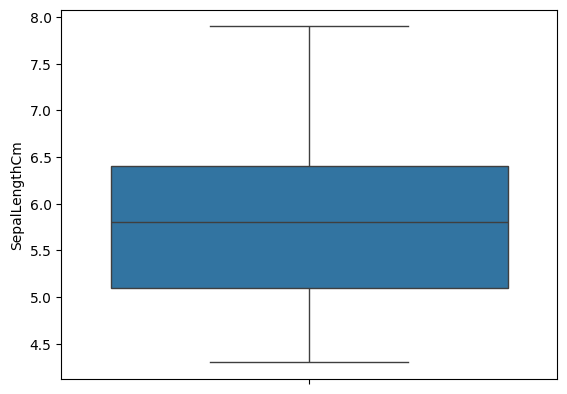

In [87]:
import seaborn as sns
sns.boxplot(df['SepalLengthCm'])

<Axes: ylabel='SepalWidthCm'>

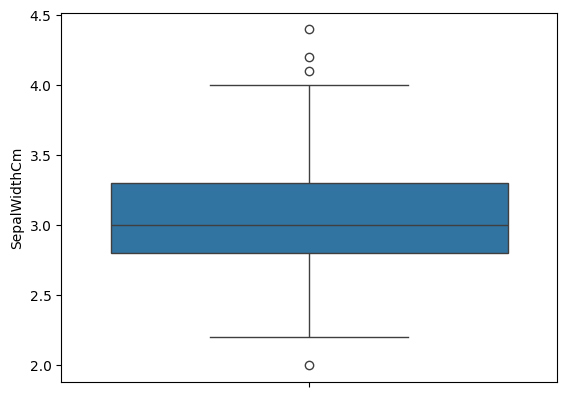

In [88]:
sns.boxplot(df['SepalWidthCm'])

In [90]:
Q1 = df['SepalWidthCm'] . quantile(0.25)
print(Q1)

2.8


In [91]:
Q3 = df['SepalWidthCm'] . quantile(0.75)
print(Q3)

3.3


In [92]:
IQR = Q3-Q1
IQR

0.5

In [93]:
lower_bound = Q1 - (1.5 * IQR)
print(lower_bound)


2.05


In [94]:
upper_bound = Q3 + (1.5 * IQR)
print(upper_bound)

4.05


<Axes: ylabel='PetalLengthCm'>

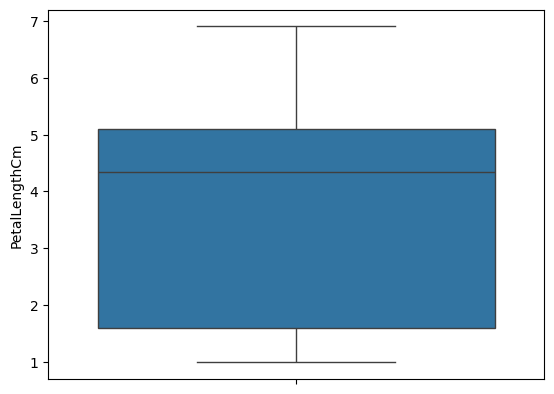

In [95]:
sns.boxplot(df['PetalLengthCm'])

<Axes: ylabel='PetalWidthCm'>

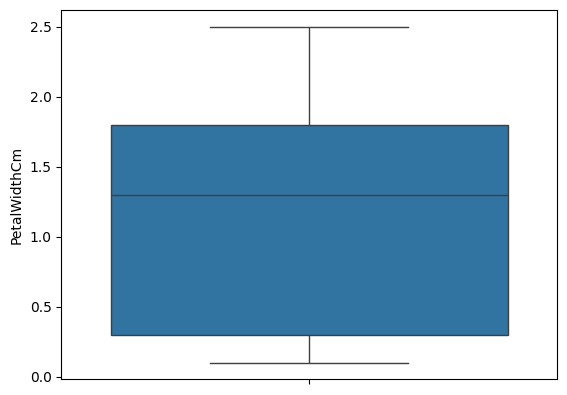

In [96]:
sns.boxplot(df['PetalWidthCm'])

Split the Dataset into Training and Testing Sets and Build the Model

<Axes: ylabel='Species'>

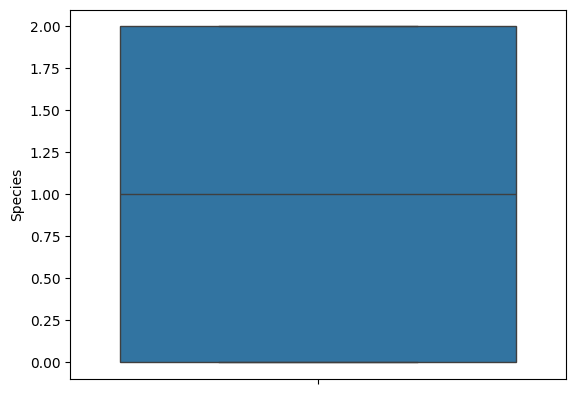

In [97]:
# Encode the target variable
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
sns.boxplot(df['Species'])

In [98]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
df['Id'] = Scaler.fit_transform(df[['Id']])
df['SepalLengthCm'] = Scaler.fit_transform(df[['SepalLengthCm']])
df['SepalWidthCm'] = Scaler.fit_transform(df[['SepalWidthCm']])
df['PetalLengthCm'] = Scaler.fit_transform(df[['PetalLengthCm']])
df['PetalWidthCm'] = Scaler.fit_transform(df[['PetalWidthCm']])

In [99]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977,0


In [100]:
x = df.iloc[:, 0 :-1]
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...,...
145,1.628164,1.038005,-0.124958,0.819624,1.447956
146,1.651258,0.553333,-1.281972,0.705893,0.922064
147,1.674353,0.795669,-0.124958,0.819624,1.053537
148,1.697448,0.432165,0.800654,0.933356,1.447956


In [101]:
y = df.iloc[: , -1]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [102]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [103]:
x_train.shape

(120, 5)

In [104]:
y_test.shape

(30,)

In [105]:
# Build and train the model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [106]:
# Predict on the testing set
y_pred = model.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [107]:
# Evaluate the model's performance
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [108]:
# Print classification report
print(classification_report(y_test, y_pred, target_names=le.classes_))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



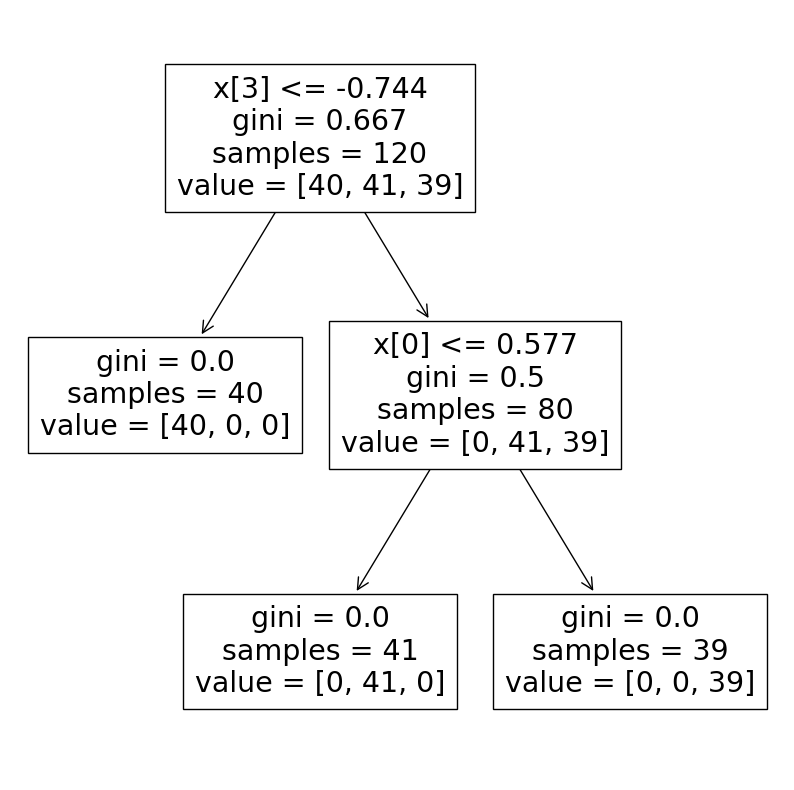

In [109]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(model.fit(x_train,y_train))
plt.show()